# **Tarea 2**

## _Punto 1:_

### 1. Modelado del problema como un MDP

Modele este problema como un MDP. Detalle todos los elementos del MDP:

- **Estados**  
- **Recompensas**  
- **Acciones**  
- **Dinámica de transición**:  
  $$ p(s', r \mid s, a) \quad \forall s, s', r, a $$  
- **Factor de descuento**:  
  $$ \gamma $$

Se definen las librerias requeridas

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Se definen las razones de probabilidad del dado cargado, lo que significa que las probailidades no son uniformes, algunas tienen más probabilidad de salir que otras. En lugar de un dado justo con una probabilidad uniforme de 1/6, aquí se asignan valores específicos: sacar un 1 o 6 tiene una probabilidad de 10%, un 2 o un 5 ocurre el 15% del tiempo, y un 3 o un 4 sucede con mayor frecuencia (20%). Esto afecta las transiciones del MDP, ya que los valores medios (3 y 4) serán más comunes, influyendo en la estrategia óptima del jugador al moverse en el tablero.

In [3]:
probabilidades = np.array([0.1, 0.2, 0.3, 0.2, 0.1, 0.1])  # dado cargado

A continuación, se definen dos diccionarios en Python que modelan las escaleras y serpientes del tablero, donde las claves representan las casillas de inicio y los valores indican las casillas destino. El diccionario escaleras indica las casillas donde un jugador avanza automáticamente a una posición más alta, mientras que serpientes representa las casillas que obligan al jugador a retroceder, dificultando su progreso. Estas transiciones no lineales afectan la dinámica del juego y se incorporan en la función de probabilidad de transición del MDP, asegurando que el modelo refleje correctamente las reglas del juego.

In [4]:
# Definir posiciones de escaleras y serpientes
escaleras = {8: 26, 21: 82, 43: 77, 50: 91, 54: 93, 66: 87, 62: 96} # modelado de 7 escaleras, la escalera que conecta los estados 80 y 100, por practicidad no se considera al ser ambos estados terminales de victoria.
serpientes = {52: 11, 69: 33, 92: 51, 48: 9, 73: 1, 55: 7, 46: 5, 95: 24, 64: 36, 44: 22, 98: 28, 83: 19, 59: 17} # modelado de serpientes

Se definen mediante listas, los estados correspondientes a victoria o derrota denotados en la grafica de color azul y rojo respectivamente, así como los estados terminales en conjunto.

In [5]:
# Estados terminales
estadoGanar = [80, 100]
estadoPerder = [23, 37, 45, 67, 89]
estadosTerminales = set(estadoGanar + estadoPerder)

Se definen los estados validos para el juego

In [6]:
# Estados no válidos (solo entradas a escaleras y serpientes)
estadosInvalidos = set(escaleras.keys()).union(set(serpientes.keys()))

Se consideran paara los estados validos calculados, las expepciones de los estados terminales y estados invalidos

In [7]:
# Estados válidos (excluyendo entradas de escaleras, serpientes y terminales)
estadosValidos = set(range(1, 101)) - estadosTerminales - estadosInvalidos

Se inicializa la tabla de valor de estado, poniendo los valores en 0

In [8]:
# Inicialización de valores de estado en 0
valoresEstado = {s: 0 for s in range(1, 101)}

Se inicializan las recompensas, como se establece en el tablero del ejercicio

In [9]:
# Inicialización de recompensas
recompensasEstado = {s: (100 if s in estadoGanar else -100 if s in estadoPerder else -1) for s in range(1, 101)}

Se muestra la matriz inicial con los valores de estado inicializados

In [10]:
def mostrarMatrizInicial():
    matriz = np.zeros((10, 10), dtype=object)
    for i in range(10):
        for j in range(10):
            estado = i * 10 + (j + 1 if i % 2 == 0 else 10 - j)
            matriz[9 - i, j] = f"{valoresEstado[estado]:7.2f}"

    print("\nMatriz Inicial de Valores de Estado (10x10):")
    for fila in matriz:
        print(" ".join(str(valor) for valor in fila))

mostrarMatrizInicial()


Matriz Inicial de Valores de Estado (10x10):
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00
   0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00    0.00


Se muestra la distribución de recompensas esstablecida para el ejercicio

In [11]:
def mostrarMatrizRecompensas():
    matriz = np.zeros((10, 10), dtype=object)
    for i in range(10):
        for j in range(10):
            estado = i * 10 + (j + 1 if i % 2 == 0 else 10 - j)
            matriz[9 - i, j] = f"{recompensasEstado[estado]:7d}"

    print("\nMatriz de Recompensas por Estado (10x10):")
    for fila in matriz:
        print(" ".join(str(valor) for valor in fila))

mostrarMatrizRecompensas()


Matriz de Recompensas por Estado (10x10):
    100      -1      -1      -1      -1      -1      -1      -1      -1      -1
     -1      -1      -1      -1      -1      -1      -1      -1    -100      -1
    100      -1      -1      -1      -1      -1      -1      -1      -1      -1
     -1      -1      -1      -1      -1      -1    -100      -1      -1      -1
     -1      -1      -1      -1      -1      -1      -1      -1      -1      -1
     -1      -1      -1      -1    -100      -1      -1      -1      -1      -1
     -1      -1      -1    -100      -1      -1      -1      -1      -1      -1
     -1      -1    -100      -1      -1      -1      -1      -1      -1      -1
     -1      -1      -1      -1      -1      -1      -1      -1      -1      -1
     -1      -1      -1      -1      -1      -1      -1      -1      -1      -1


Se define una función para graficar las recompensas

In [12]:
def mostrarGraficoRecompensas(recompensas):
    plt.plot(recompensas)
    plt.xlabel("Episodio")
    plt.ylabel("Recompensa Acumulada")
    plt.title("Recompensas Acumuladas por Episodio")
    plt.grid(True)
    plt.show()

Esta función, calcula el próximo estado en el juego de escaleras y serpientes considerando la acción elegida (avanzar o retroceder) y el resultado del dado. Si el estado actual es terminal, retorna el mismo estado. Luego, según la acción, suma o resta el valor del dado. Aplica una lógica de rebote cuando el estado excede los límites del tablero (mayor a 100 o menor a 1), aunque el rebote en el extremo inferior podría mejorarse para mayor precisión. Finalmente, si el nuevo estado corresponde a la base de una escalera o la cabeza de una serpiente, se actualiza automáticamente al estado resultante. La función es sólida, pero convendría revisar y ajustar la lógica del rebote en el extremo inferior para mayor exactitud.

In [13]:
def calcularNuevoEstado(s, a, resultadoDado):
    if s in estadosTerminales:
        return s

    if a == "avanzar":
        nuevoEstado = s + resultadoDado
    elif a == "retroceder":
        nuevoEstado = s - resultadoDado
    else:
        raise ValueError("Acción no válida")

    if nuevoEstado > 100:
        nuevoEstado = 100 - (nuevoEstado - 100)
    elif nuevoEstado < 1:
        nuevoEstado = 1 + (1 - nuevoEstado)

    if nuevoEstado in escaleras:
        nuevoEstado = escaleras[nuevoEstado]
    if nuevoEstado in serpientes:
        nuevoEstado = serpientes[nuevoEstado]

    return nuevoEstado

Se define una función que ejecuta 1000 simulaciones del juego, comenzando cada episodio en la casilla 1 y finalizando al llegar a un estado terminal. En cada paso, el agente elige aleatoriamente avanzar o retroceder, lanza un dado cargado para determinar el número de casillas a mover y calcula el nuevo estado considerando las reglas del juego (incluyendo escaleras, serpientes y rebotes). Luego, aplica la ecuación de Bellman en tiempo real para actualizar el valor del estado actual, ponderando las probabilidades del dado y considerando la recompensa obtenida más el valor futuro esperado con un factor de descuento de 0.9. La actualización es una media entre el valor calculado y el valor anterior del estado. La recompensa acumulada de cada episodio se registra en una lista, la cual se retorna al finalizar las simulaciones.

In [14]:
def bellmanDP():
    recompensasAcumuladas = []
    for _ in range(1000):
        estado = 1
        recompensaAcumulada = 0
        while estado not in estadosTerminales:
            accion = np.random.choice(["avanzar", "retroceder"])
            resultadoDado = np.random.choice([1, 2, 3, 4, 5, 6], p=probabilidades)
            nuevoEstado = calcularNuevoEstado(estado, accion, resultadoDado)
            recompensa = recompensasEstado[nuevoEstado]
            
            # Aplicación de la ecuación de Bellman en cada paso
            sumaAccion = 0
            for dado, p in zip(range(1, 7), probabilidades):
                siguienteEstado = calcularNuevoEstado(estado, accion, dado)
                sumaAccion += p * (recompensasEstado[siguienteEstado] + 0.9 * valoresEstado[siguienteEstado])
            valoresEstado[estado] = 0.5 * sumaAccion + 0.5 * valoresEstado[estado]

            recompensaAcumulada += recompensa
            estado = nuevoEstado
        recompensasAcumuladas.append(recompensaAcumulada)
    return recompensasAcumuladas

Se define una función, que visualiza los valores finales de cada estado del tablero en formato de matriz 10x10, reflejando la disposición del juego de escaleras y serpientes. Primero, inicializa una matriz de 10x10 con ceros y tipo de dato object para formatear los valores como texto. Luego, recorre cada celda utilizando dos bucles anidados: el índice i determina la fila y j la columna. Para reflejar el patrón en zigzag del tablero (donde las filas pares avanzan de izquierda a derecha y las impares de derecha a izquierda), se usa la condición i % 2 para calcular el número del estado correspondiente. El valor del estado se asigna a la celda correspondiente con formato de dos decimales. Finalmente, la función imprime la matriz, mostrando cada fila con los valores alineados, lo que proporciona una visualización clara de los valores finales de cada casilla del tablero.

In [15]:
def mostrarMatrizValores():
    matriz = np.zeros((10, 10), dtype=object)
    for i in range(10):
        for j in range(10):
            estado = i * 10 + (j + 1 if i % 2 == 0 else 10 - j)
            matriz[9 - i, j] = f"{valoresEstado[estado]:7.2f}"

    print("\nMatriz de Valores Finales de los Estados (10x10):")
    for fila in matriz:
        print(" ".join(str(valor) for valor in fila))

Se ejecuta la simulación parametrizada y generar los datos tabulares.

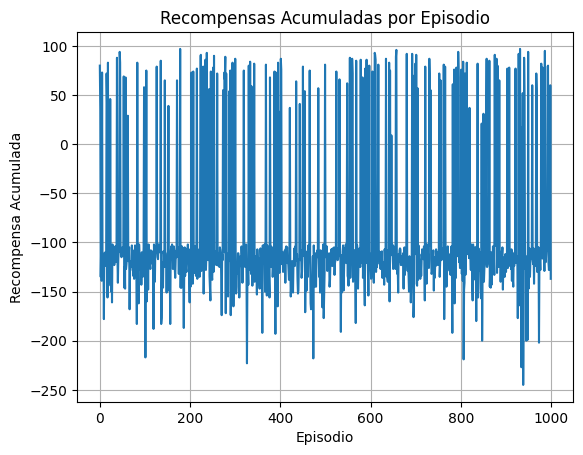


Matriz de Valores Finales de los Estados (10x10):
   0.00   -8.47    0.00  -22.34  -15.17    0.00  -14.18  -24.29    0.00  -32.75
   5.87    9.95    0.00    5.19  -12.15  -28.22  -20.04  -19.08    0.00  -25.63
   0.00   -1.64   -4.25   11.10   -2.33   -0.23   -9.11    0.00  -29.78  -26.04
 -25.18    0.00  -32.31    0.00  -24.73    0.00    0.00  -30.13    0.00  -31.97
  -8.02    0.00  -14.26  -15.00  -11.48    0.00    0.00  -12.38    0.00  -24.84
 -53.19  -45.28    0.00    0.00    0.00    0.00  -31.42    0.00  -32.79    0.00
 -52.61  -52.45  -48.88    0.00  -46.56  -49.57  -57.88  -43.00  -40.70  -39.26
   0.00  -26.75    0.00  -37.91  -39.46  -39.86  -42.51  -41.75  -42.49  -43.43
 -33.61  -26.85  -26.86  -23.64  -23.18  -22.74  -24.53  -23.32  -26.66  -24.66
 -24.47  -25.30  -24.44  -25.33  -28.63  -25.92  -24.74    0.00  -25.70  -26.54


In [16]:
# Ejecutar la simulación con actualización en tiempo real usando la ecuación de Bellman
recompensas = bellmanDP()
mostrarGraficoRecompensas(recompensas)
mostrarMatrizValores()